# Solve Any Data Analysis Problem

## Chapter 8 - Project 7 - Example solution - Part 2

Data from: https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads#yearly-file

Data dictionary: https://www.kaggle.com/datasets/hm-land-registry/uk-housing-prices-paid

- **Transaction unique identifier** A reference number which is generated automatically recording each published sale. The number is unique and will change each time a sale is recorded.
- **Price** Sale price stated on the transfer deed.
- **Date of Transfer** Date when the sale was completed, as stated on the transfer deed.
- **Property Type** D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other

Note that:

    we only record the above categories to describe property type, we do not separately identify bungalows.
    end-of-terrace properties are included in the Terraced category above.
    ‘Other’ is only valid where the transaction relates to a property type that is not covered by existing values.
  
- **Old/New** Indicates the age of the property and applies to all price paid transactions, residential and non-residential.
Y = a newly built property, N = an established residential building
- **Duration** Relates to the tenure: F = Freehold, L= Leasehold etc.

Note that HM Land Registry does not record leases of 7 years or less in the Price Paid Dataset.
- **Town/City**
- **District**
- **County**
- **PPD Category Type** Indicates the type of Price Paid transaction.
A = Standard Price Paid entry, includes single residential property sold for full market value.
B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage) and transfers to non-private individuals. Note that category B does not separately identify the transaction types stated. HM Land Registry has been collecting information on Category A transactions from January 1995. Category B transactions were identified from October 2013.
- **Record Status** - monthly file only Indicates additions, changes and deletions to the records.(see guide below).
A = Addition
C = Change
D = Delete.

Column names are a combination of the above and address column details from https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads#using-or-publishing-our-price-paid-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format

price_paid = pd.read_csv("./data/price_paid.csv.gz",
                         parse_dates=["sale_date"])
print(price_paid.shape)
price_paid.head()

(2800288, 16)


transaction_id  sale_price  sale_date  postcode  \
0  {D707E535-5720-0AD9-E053-6B04A8C067CC}      260000 2021-08-06  SO45 2HT   
1  {D707E535-5721-0AD9-E053-6B04A8C067CC}      375000 2021-09-01  SO23 7FR   
2  {D707E535-5723-0AD9-E053-6B04A8C067CC}      132000 2021-06-28  SP11 6RL   
3  {D707E535-5724-0AD9-E053-6B04A8C067CC}      295000 2021-09-10  SP11 6TU   
4  {D707E535-5725-0AD9-E053-6B04A8C067CC}      360000 2021-08-27  SO51 0AX   

  property_type old_new duration house_number_name  \
0             T       N        F                17   
1             S       N        F                 1   
2             F       N        L                 2   
3             T       N        F                21   
4             T       N        F               130   

  second_addressable_object_name           street      locality    town_city  \
0                     Unnamed: 8  PERRYWOOD CLOSE       HOLBURY  SOUTHAMPTON   
1                            NaN   BOXALL GARDENS  KINGS WORTHY   WINCHESTER   
2                            NaN       SEDGE ROAD           NaN      ANDOVER   
3                            NaN        NAP CLOSE           NaN      ANDOVER   
4                            NaN  FREEMANTLE ROAD           NaN       ROMSEY   

      district     county category_type record_status  
0   NEW FOREST  HAMPSHIRE             A           A.1  
1   WINCHESTER  HAMPSHIRE             A             A  
2  TEST VALLEY  HAMPSHIRE             A             A  
3  TEST VALLEY  HAMPSHIRE             A             A  
4  TEST VALLEY  HAMPSHIRE             A             A

In [2]:
price_paid.isnull().sum()

transaction_id                          0
sale_price                              0
sale_date                               0
postcode                             7816
property_type                           0
old_new                                 0
duration                                0
house_number_name                       0
second_addressable_object_name    2447843
street                              50677
locality                          1740795
town_city                               0
district                                0
county                                  0
category_type                           0
record_status                           0
dtype: int64

What do addresses with missing street names look like?

In [3]:
price_paid.loc[price_paid["street"].isnull(),
               ["house_number_name", "second_addressable_object_name",
                "street", "postcode", "locality", "town_city",
                "district", "county"]]

house_number_name second_addressable_object_name street  postcode  \
122                 THE BARN                            NaN    NaN  GL54 2LG   
123                 WISTERIA                            NaN    NaN   GL2 8EB   
538                TOWN MILL                        FLAT 20    NaN  RG25 3JE   
1081          THE OLD SCHOOL                            NaN    NaN  IP27 9LG   
1302           ORCHARD HOUSE                            NaN    NaN   SY4 1BJ   
...                      ...                            ...    ...       ...   
2799418    CHETSFORD COTTAGE                            NaN    NaN   TA4 4EA   
2799425  QUARRY HILL COTTAGE                            NaN    NaN  BA22 7EA   
2799723     ALBERT WAREHOUSE                         FLAT 3    NaN   GL1 2EE   
2799987     HILLSIDE COTTAGE                            NaN    NaN  GL15 4LY   
2800004  MULBERRY COTTAGE, 7                            NaN    NaN  GL56 9PA   

                    locality         town_city                   district  \
122      CLAPTON ON THE HILL        CHELTENHAM                   COTSWOLD   
123                TIBBERTON        GLOUCESTER             FOREST OF DEAN   
538                  OVERTON       BASINGSTOKE      BASINGSTOKE AND DEANE   
1081               SEDGE FEN           BRANDON               WEST SUFFOLK   
1302                 WILCOTT        SHREWSBURY                 SHROPSHIRE   
...                      ...               ...                        ...   
2799418     WEST QUANTOXHEAD           TAUNTON  SOMERSET WEST AND TAUNTON   
2799425            BLACKFORD            YEOVIL             SOUTH SOMERSET   
2799723            THE DOCKS        GLOUCESTER                 GLOUCESTER   
2799987           VINEY HILL            LYDNEY             FOREST OF DEAN   
2800004             TODENHAM  MORETON-IN-MARSH                   COTSWOLD   

                  county  
122      GLOUCESTERSHIRE  
123      GLOUCESTERSHIRE  
538            HAMPSHIRE  
1081             SUFFOLK  
1302          SHROPSHIRE  
...                  ...  
2799418         SOMERSET  
2799425         SOMERSET  
2799723  GLOUCESTERSHIRE  
2799987  GLOUCESTERSHIRE  
2800004  GLOUCESTERSHIRE  

[50677 rows x 8 columns]

These look like houses that have "names" e.g. River Cottage. Presumably these are identifiable by postcode and name alone meaning they don't require a street field.

Let's fill in the street column with a placeholder for missing data, since the missingness is relevant and not something to be thrown away.

In [4]:
STREET_PLACEHOLDER = "-- NO STREET INFORMATION --"

price_paid["street"] = price_paid["street"].fillna(STREET_PLACEHOLDER)

What about missing postcodes?

In [5]:
price_paid.loc[price_paid["postcode"].isnull(),
               ["house_number_name", "second_addressable_object_name",
                "street", "postcode", "locality", "town_city",
                "district", "county"]]

house_number_name second_addressable_object_name  \
264                    6B              GROUND FLOOR FLAT   
1973           GARAGE 680                            NaN   
3908     KIRKBY PARK WOOD                            NaN   
3950          CHURCH FARM                            NaN   
4280          NORTH TOWER                            NaN   
...                   ...                            ...   
2791383       LONG MEADOW                            NaN   
2791688   WAREHOUSE COURT                         UNIT 1   
2791905            GARAGE                            NaN   
2791926      SALTLEY GATE                         UNIT 1   
2798903                 6                            NaN   

                              street postcode    locality          town_city  \
264                     GRIMSBY ROAD      NaN         NaN        CLEETHORPES   
1973                 EASTBROOK DRIVE      NaN  RUSH GREEN            ROMFORD   
3908     -- NO STREET INFORMATION --      NaN   GRIZEBECK  KIRKBY-IN-FURNESS   
3950     -- NO STREET INFORMATION --      NaN    PENHURST             BATTLE   
4280                       DEANSGATE      NaN         NaN         MANCHESTER   
...                              ...      ...         ...                ...   
2791383  -- NO STREET INFORMATION --      NaN    AUSTWICK          LANCASTER   
2791688          MAJOR DRAPER STREET      NaN         NaN             LONDON   
2791905               DUFFRYN STREET      NaN         NaN       MOUNTAIN ASH   
2791926                CRANBY STREET      NaN         NaN         BIRMINGHAM   
2798903                    SUNNYSIDE      NaN       CHIRK            WREXHAM   

                        district                   county  
264      NORTH EAST LINCOLNSHIRE  NORTH EAST LINCOLNSHIRE  
1973        BARKING AND DAGENHAM           GREATER LONDON  
3908              SOUTH LAKELAND                  CUMBRIA  
3950                      ROTHER              EAST SUSSEX  
4280                  MANCHESTER       GREATER MANCHESTER  
...                          ...                      ...  
2791383          NORTH YORKSHIRE          NORTH YORKSHIRE  
2791688                GREENWICH           GREATER LONDON  
2791905       RHONDDA CYNON TAFF       RHONDDA CYNON TAFF  
2791926               BIRMINGHAM            WEST MIDLANDS  
2798903               SHROPSHIRE               SHROPSHIRE  

[7816 rows x 8 columns]

These don't look like incomplete records, either special house names again or just missing postcode data.

We'll leave them in for now but at the same time we need to be aware of this missingness in case our app eventually wants to use postcode.

In [6]:
price_paid["sale_price"].describe()

count     2800288.00
mean       391996.55
std       1440475.15
min             1.00
25%        173000.00
50%        270000.00
75%        420000.00
max     523000000.00
Name: sale_price, dtype: float64

Odd, some very low prices in there

In [7]:
price_paid[price_paid["sale_price"] == 1]

transaction_id  sale_price  sale_date  \
2015969  {EC7AD099-994E-9200-E053-6C04A8C0E306}           1 2022-09-30   

        postcode property_type old_new duration house_number_name  \
2015969  SS7 5EJ             T       N        F                22   

        second_addressable_object_name           street locality town_city  \
2015969                            NaN  PEREGRINE DRIVE      NaN  BENFLEET   

             district county category_type record_status  
2015969  CASTLE POINT  ESSEX             A             A

In [8]:
(
    price_paid.loc[price_paid["sale_price"] < 1000,
    ["sale_price", "house_number_name",
     "street", "town_city", "postcode",
     "district", "county", "category_type"]
    ]
    .sample(10, random_state=42)
)

sale_price house_number_name               street       town_city  \
318226          280                15       CRAWSHAW GROVE       SHEFFIELD   
552148          950                35     ST MARTINS DRIVE       BLACKBURN   
1432981         950                57         NURSERY ROAD       LIVERPOOL   
515898          750                26        CHANTREY ROAD       SHEFFIELD   
497854          650               180           THE AVENUE           LEIGH   
620990          200                17  BARNESDALE CRESCENT       ORPINGTON   
1782426         700                1A          WHITBY ROAD  ELLESMERE PORT   
497851          650                36     NORFOLK CRESCENT      MANCHESTER   
856099          250                54         CARGILL ROAD          LONDON   
2078143         750                10        ROYSTON CLOSE            BURY   

         postcode                   district                     county  \
318226     S8 7EA                  SHEFFIELD            SOUTH YORKSHIRE   
552148    BB2 5HU      BLACKBURN WITH DARWEN      BLACKBURN WITH DARWEN   
1432981   L31 4JJ                     SEFTON                 MERSEYSIDE   
515898     S8 8QW                  SHEFFIELD            SOUTH YORKSHIRE   
497854    WN7 1HR                      WIGAN         GREATER MANCHESTER   
620990    BR5 2AU                    BROMLEY             GREATER LONDON   
1782426  CH65 4AR  CHESHIRE WEST AND CHESTER  CHESHIRE WEST AND CHESTER   
497851    M35 0WG                     OLDHAM         GREATER MANCHESTER   
856099   SW18 3EB                 WANDSWORTH             GREATER LONDON   
2078143   BL8 4BZ                       BURY         GREATER MANCHESTER   

        category_type  
318226              B  
552148              B  
1432981             B  
515898              B  
497854              B  
620990              B  
1782426             B  
497851              B  
856099              B  
2078143             B

In [9]:
(
    price_paid.loc[price_paid["sale_price"] < 10_000,
                   "category_type"]
    .value_counts()
)

B    8372
A      25
Name: category_type, dtype: int64

These seem to be "category B" which, according to the data dictionary, means _"transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage) and transfers to non-private individuals"_

It's possible these are therefore special cases. We'd have to find out more, but let's leave them in for now since we don't want to start removing transactions without good reason.

And that positive outlier?

In [10]:
price_paid[price_paid["sale_price"] > 300_000_000]

transaction_id  sale_price  sale_date  \
156563   {EA3278AA-FA35-2676-E053-6B04A8C015F8}   523000000 2021-09-16   
307146   {FFA361DB-8C7C-8A03-E053-4804A8C01F61}   414108660 2021-09-30   
497874   {E073986C-2B5A-2134-E053-6C04A8C0233B}   421364142 2021-05-28   
530132   {DBA933FA-5BCC-669D-E053-6B04A8C0AD56}   372600000 2021-03-26   
1791832  {FD226036-9858-4CB7-E053-4804A8C00430}   429000000 2022-04-22   

         postcode property_type old_new duration    house_number_name  \
156563        NaN             O       N        L           ONE THAMES   
307146    OX4 4GB             O       N        L  OXFORD SCIENCE PARK   
497874     E1 8EP             O       N        F      BEAGLE HOUSE, 1   
530132   EC1Y 8RQ             O       N        F                   15   
1791832  WC1B 4JB             O       N        F       VICTORIA HOUSE   

        second_addressable_object_name              street locality town_city  \
156563                         PHASE 1      NINE ELMS LANE      NaN    LONDON   
307146                             NaN  EDMUND HALLEY ROAD      NaN    OXFORD   
497874                             NaN       BRAHAM STREET      NaN    LONDON   
530132                             NaN       MALLOW STREET      NaN    LONDON   
1791832                            NaN     SOUTHAMPTON ROW      NaN    LONDON   

                  district          county category_type record_status  
156563          WANDSWORTH  GREATER LONDON             B             A  
307146   SOUTH OXFORDSHIRE     OXFORDSHIRE             B             A  
497874       TOWER HAMLETS  GREATER LONDON             B             A  
530132           ISLINGTON  GREATER LONDON             B             A  
1791832             CAMDEN  GREATER LONDON             B             A

Possibly this? https://www.gillespies.co.uk/news/thames-city-opens-phase-1-of-nine-elms-park

We don't want to include entire developments in our data so we will exclude everything above, say, £10 million. That's a reasonable cutoff for most residential buyers.

In [11]:
price_paid = price_paid[price_paid["sale_price"] < 10_000_000]

### Categorical columns

Let's re-map the property_type category

In [12]:
price_paid["property_type"].value_counts(dropna=False)

T    788562
S    743315
D    639965
F    486130
O    139261
Name: property_type, dtype: int64

In [13]:
property_type_map = {
    "D": "Detached",
    "S": "Semi-Detached",
    "T": "Terraced",
    "F": "Flats",
    "O": "Other"
}

price_paid["property_type"] = (
    price_paid["property_type"]
    .map(property_type_map)
)

price_paid["property_type"].value_counts()

Terraced         788562
Semi-Detached    743315
Detached         639965
Flats            486130
Other            139261
Name: property_type, dtype: int64

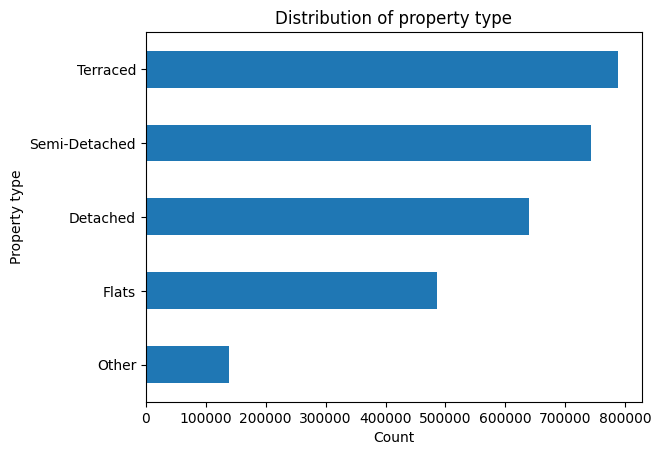

In [14]:
fig, axis = plt.subplots()

(
    price_paid["property_type"]
    .value_counts()
    .sort_values()
    .plot
    .barh(ax=axis)
)

axis.set(
    title="Distribution of property type",
    xlabel="Count",
    ylabel="Property type"
)

plt.show()

Now old/new

In [15]:
price_paid["old_new"].value_counts(dropna=False)

N    2585263
Y     211970
Name: old_new, dtype: int64

In [16]:
price_paid["old_new"] = (
    price_paid["old_new"]
    .map(
        {
            "Y": "New build",
            "N": "Existing property"
        }
    )
)

price_paid["old_new"].value_counts()

Existing property    2585263
New build             211970
Name: old_new, dtype: int64

Tenure

In [17]:
price_paid["duration"].value_counts(dropna=False)

F    2158090
L     639143
Name: duration, dtype: int64

In [18]:
price_paid["duration"] = (
    price_paid["duration"]
    .map(
        {
            "F": "Freehold",
            "L": "Leasehold"
        }
    )
)

price_paid["duration"].value_counts()

Freehold     2158090
Leasehold     639143
Name: duration, dtype: int64

In [19]:
price_paid["category_type"].value_counts(dropna=False)

A    2378765
B     418468
Name: category_type, dtype: int64

Do we want to drop type B transactions? There are arguments either way, so it's something to consider depending on exactly how our stakeholders believe the users will use the proposed app.

Now let's investigate record status

In [20]:
price_paid["record_status"].value_counts(dropna=False)

A      2797230
A.1          3
Name: record_status, dtype: int64

As expected since this is the yearly file, not the monthly ones, so all records are additions rather than changes/deletions. This should be a comprehensive record of what happened in those years, not records with possible pending changes.

### Geography

Which level of address granularity could we use to extract only Welsh properties?

What about city?

In [21]:
price_paid["town_city"] = price_paid["town_city"].str.upper()
price_paid["town_city"].nunique()

1150

Let's now look at counties

In [22]:
price_paid["county"] = price_paid["county"].str.upper()
price_paid["county"].value_counts()

GREATER LONDON        311630
GREATER MANCHESTER    128176
WEST YORKSHIRE        107111
WEST MIDLANDS         104199
KENT                   80920
                       ...  
BLAENAU GWENT           3192
MERTHYR TYDFIL          2417
RUTLAND                 2004
NORTHAMPTONSHIRE         707
ISLES OF SCILLY           56
Name: county, Length: 115, dtype: int64

At the bottom, Northamptonshire only has 700 transactions in 3 years? Unlikely. Are there different versions/spellings?

In [23]:
(
    price_paid
    .loc[price_paid["county"].str.contains("NORTH"), "county"]
    .unique()
)

array(['NORTH EAST LINCOLNSHIRE', 'NORTH LINCOLNSHIRE',
       'NORTH NORTHAMPTONSHIRE', 'WEST NORTHAMPTONSHIRE',
       'NORTH YORKSHIRE', 'NORTH SOMERSET',
       'BATH AND NORTH EAST SOMERSET', 'NORTHUMBERLAND',
       'NORTHAMPTONSHIRE'], dtype=object)

Looks like there are 3.

In [24]:
len(price_paid[price_paid["county"].isin(["NORTHAMPTONSHIRE", "NORTH NORTHAMPTONSHIRE", "WEST NORTHAMPTONSHIRE"])])

39237

In [25]:
price_paid["county"].nunique()

115

The data is for England and Wales so it should be 48 + 22 = 70 unique counties.

Our data will need cross-referencing with official lists!

Let's try to separate the data into England vs. Wales.

Wales is smaller and has fewer counties, so if we find those we can assume the rest of the data is England by process of elimination.

"Unitary Authorities" of Wales are available here: https://law.gov.wales/local-government-bodies

In [26]:
welsh_councils = [
    c.upper() for c in ["Blaenau Gwent", "Bridgend", "Caerphilly",
                        "Cardiff", "Carmarthenshire", "Ceredigion",
                        "Conwy", "Denbighshire", "Flintshire",
                        "Gwynedd", "Isle of Anglesey", "Merthyr Tydfil",
                        "Monmouthshire", "Neath Port Talbot", "Newport",
                        "Pembrokeshire", "Powys", "Rhondda Cynon Taf",
                        "Swansea", "The Vale of Glamorgan", "Torfaen",
                        "Wrexham"]
]

price_paid["country"] = (
    np.where(
        price_paid["county"].isin(welsh_councils),
        "WALES",
        "ENGLAND"
    )
)

price_paid["country"].value_counts(dropna=False)

ENGLAND    2663433
WALES       133800
Name: country, dtype: int64

Let's just check the counties that got matched in England to see if there are accidentally Welsh counties in there.

In [27]:
print(
    sorted(
        price_paid
        .loc[price_paid["country"] == "ENGLAND", "county"]
        .unique()
    )
)

['BATH AND NORTH EAST SOMERSET', 'BEDFORD', 'BLACKBURN WITH DARWEN', 'BLACKPOOL', 'BOURNEMOUTH, CHRISTCHURCH AND POOLE', 'BRACKNELL FOREST', 'BRIGHTON AND HOVE', 'BUCKINGHAMSHIRE', 'CAMBRIDGESHIRE', 'CENTRAL BEDFORDSHIRE', 'CHESHIRE EAST', 'CHESHIRE WEST AND CHESTER', 'CITY OF BRISTOL', 'CITY OF DERBY', 'CITY OF KINGSTON UPON HULL', 'CITY OF NOTTINGHAM', 'CITY OF PETERBOROUGH', 'CITY OF PLYMOUTH', 'CORNWALL', 'COUNTY DURHAM', 'CUMBERLAND', 'CUMBRIA', 'DARLINGTON', 'DERBYSHIRE', 'DEVON', 'DORSET', 'EAST RIDING OF YORKSHIRE', 'EAST SUSSEX', 'ESSEX', 'GLOUCESTERSHIRE', 'GREATER LONDON', 'GREATER MANCHESTER', 'HALTON', 'HAMPSHIRE', 'HARTLEPOOL', 'HEREFORDSHIRE', 'HERTFORDSHIRE', 'ISLE OF WIGHT', 'ISLES OF SCILLY', 'KENT', 'LANCASHIRE', 'LEICESTER', 'LEICESTERSHIRE', 'LINCOLNSHIRE', 'LUTON', 'MEDWAY', 'MERSEYSIDE', 'MIDDLESBROUGH', 'MILTON KEYNES', 'NORFOLK', 'NORTH EAST LINCOLNSHIRE', 'NORTH LINCOLNSHIRE', 'NORTH NORTHAMPTONSHIRE', 'NORTH SOMERSET', 'NORTH YORKSHIRE', 'NORTHAMPTONSHIRE', '

Looks like there's a mismatch between RHONDDA CYNON TAF (the official name) and RHONDDA CYNON TAFF (the name in the data). Let's update those to be categorized as Wales.

In [28]:
price_paid.loc[price_paid["county"] == "RHONDDA CYNON TAFF", "country"] = "WALES"

Let's now extract Welsh properties into their own DataFrame

In [29]:
wales = price_paid[price_paid["country"] == "WALES"].copy()

Time to start investigating aspects of it we can use in the app

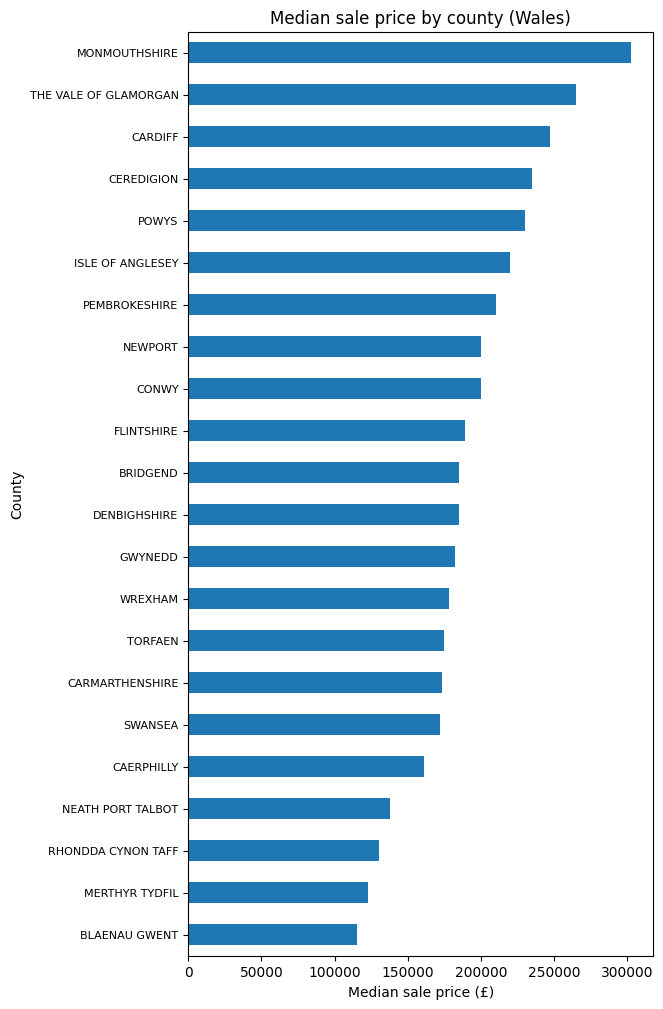

In [30]:
fig, axis = plt.subplots(figsize=(6, 12))

(
    wales
    .groupby("county")
    ["sale_price"]
    .median()
    .sort_values()
    .plot
    .barh(ax=axis)
)

axis.set(
    title="Median sale price by county (Wales)",
    xlabel="Median sale price (£)",
    ylabel="County"
)

for label in axis.get_yticklabels():
    label.set_fontsize(8)

plt.show()

Let's see how these prices changed over time

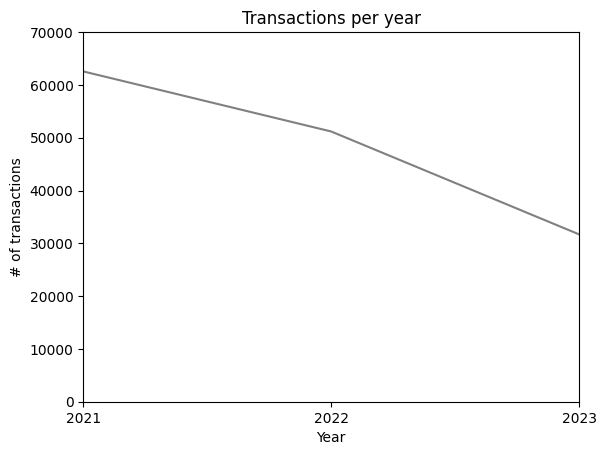

In [31]:
wales["year"] = wales["sale_date"].dt.year

fig, axis = plt.subplots()

(
    wales
    .set_index("sale_date")
    .resample("YS")
    .size()
    .plot(ax=axis, color="gray")
)

axis.set(
    title="Transactions per year",
    xlabel="Year",
    ylabel="# of transactions",
    ylim=(0, 70_000)
)

plt.show()

Looks like fewer transactions year on year in these years. Does this pattern translate to a change in median prices?

In [32]:
by_county_and_year = (
    wales
    .pivot_table(
        values="sale_price",
        index="county",
        columns="year",
        aggfunc="median"
    )
)

by_county_and_year

year                       2021      2022      2023
county                                             
BLAENAU GWENT         105000.00 125000.00 117747.50
BRIDGEND              175000.00 194995.00 185000.00
CAERPHILLY            155000.00 170000.00 163000.00
CARDIFF               240000.00 250000.00 250000.00
CARMARTHENSHIRE       169995.00 179950.00 172000.00
CEREDIGION            225000.00 245000.00 235000.00
CONWY                 195000.00 205000.00 200500.00
DENBIGHSHIRE          183295.00 186500.00 180000.00
FLINTSHIRE            183000.00 195000.00 190000.00
GWYNEDD               179250.00 190000.00 180000.00
ISLE OF ANGLESEY      208546.50 235000.00 215000.00
MERTHYR TYDFIL        115000.00 127432.00 125000.00
MONMOUTHSHIRE         290000.00 315000.00 310000.00
NEATH PORT TALBOT     132000.00 142000.00 142000.00
NEWPORT               200000.00 205000.00 200000.00
PEMBROKESHIRE         202000.00 220000.00 210000.00
POWYS                 220000.00 245000.00 232500.00
RHONDDA CYNON TAFF    125000.00 137500.00 128000.00
SWANSEA               170000.00 175000.00 170250.00
THE VALE OF GLAMORGAN 250000.00 283000.00 270000.00
TORFAEN               170000.00 176500.00 175000.00
WREXHAM               175000.00 181000.00 175000.00

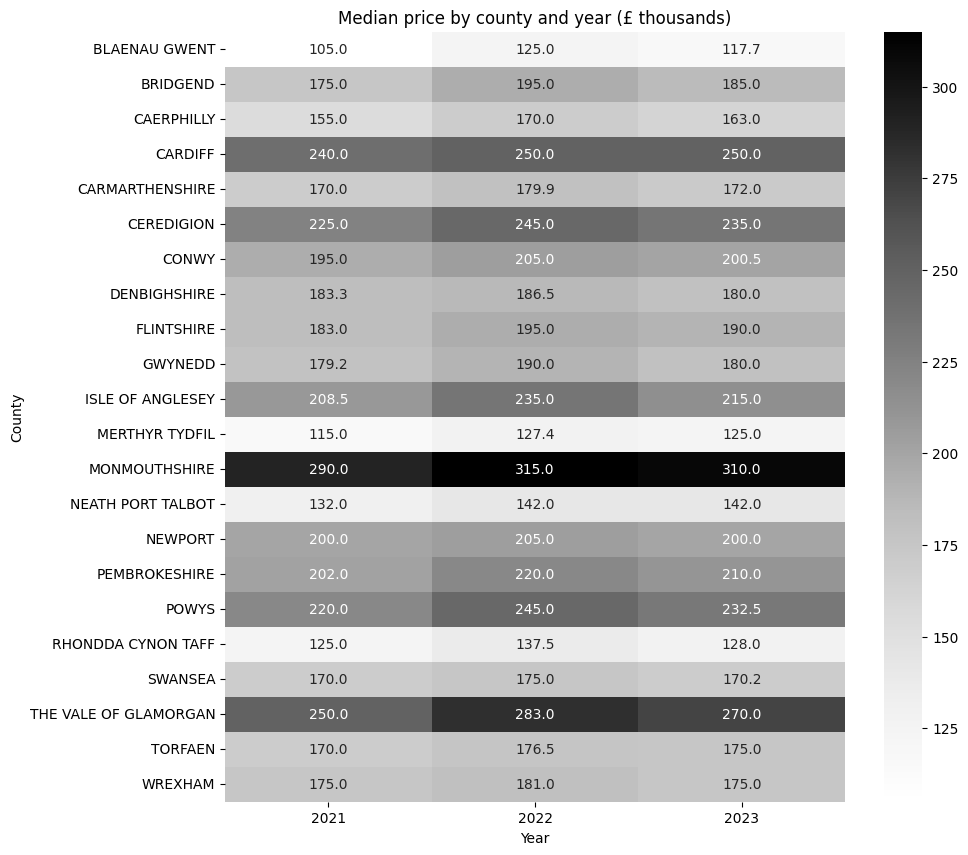

In [33]:
fig, axis = plt.subplots(figsize=(10, 10))

sns.heatmap(
    by_county_and_year / 1000,
    annot=True,
    cmap="Greys",
    fmt=".1f",
    ax=axis
)

axis.set(
    title="Median price by county and year (£ thousands)",
    xlabel="Year",
    ylabel="County"
)

plt.show()

Some counties vary more than others, the peak is usually 2022 with a downturn in 2023.

What about the price of different types of property across counties?

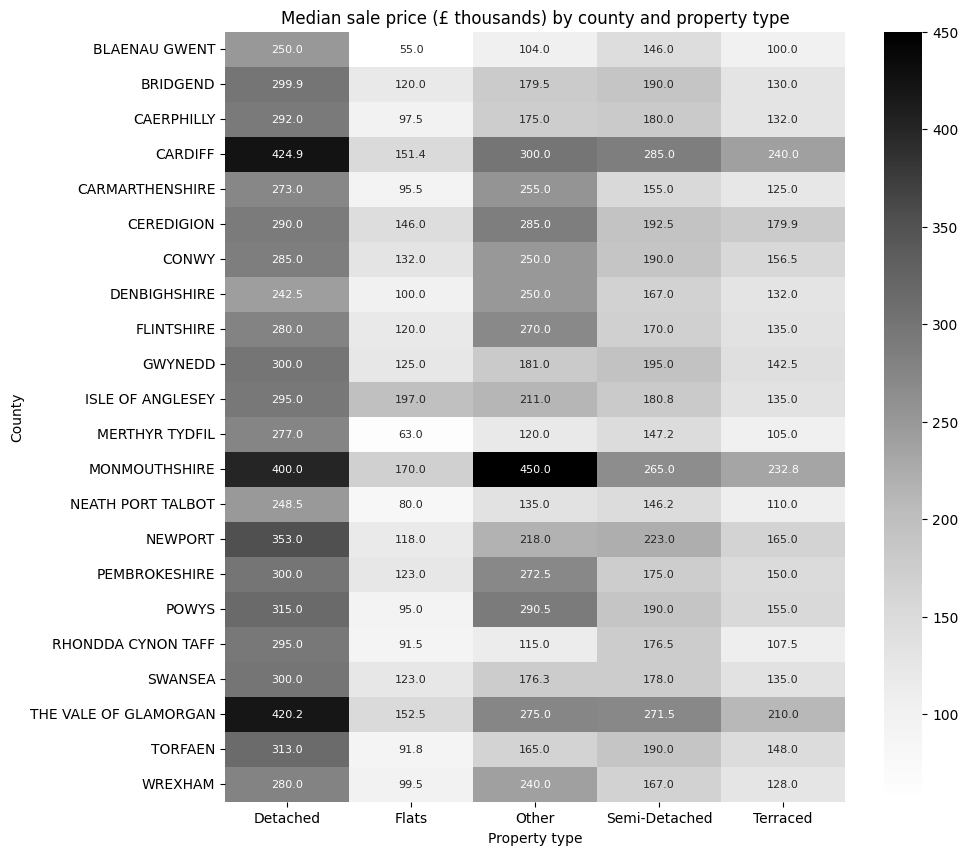

In [34]:
fig, axis = plt.subplots(figsize=(10, 10))

sns.heatmap(
    wales.pivot_table(
        index="county",
        columns="property_type",
        values="sale_price",
        aggfunc="median"
    ) / 1000,
    annot=True,
    cmap="Greys",
    fmt=".1f",
    ax=axis,
    annot_kws={"size": 8}
)

axis.set(
    title="Median sale price (£ thousands) by county and property type",
    xlabel="Property type",
    ylabel="County"
)

plt.show()

Detached houses are the most expensive everywhere. Sometimes "other" is also high, but they could be anything.

We'll add property type and a temporal chart to our app since they reveal interesting differences and trends.

Let's create ridgeline plots to show the temporal trend. We expect one row per temporal item (e.g. year or quarter) with the plot showing the distribution of sale prices each year.

We can't guarantee there are the same number of transactions each year so we can't use a tabular data structure like an array.

We can use a list of `pandas` Series for example.

In [35]:
years = sorted(wales["year"].unique())
annual_sales = []

for year in years:
    prices = (
        wales.loc[(wales["year"] == year)
                  & (wales["sale_price"] < 500_000),
        "sale_price"]
    )
    annual_sales.append([prices])

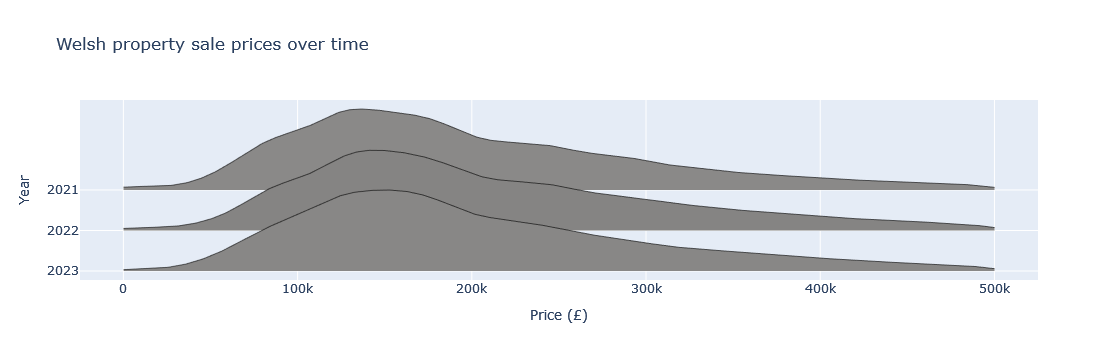

In [36]:
from ridgeplot import ridgeplot

fig = ridgeplot(annual_sales,
                labels=[str(y) for y in years],
                colorscale="gray_r")

fig.update_layout(
    title="Welsh property sale prices over time",
    xaxis_title="Price (£)",
    yaxis_title="Year",
    showlegend=False
)

fig.show()

These are nice! Let's try one per county (2023 only to remove the temporal trend)

In [37]:
counties = sorted(wales["county"].unique())
sales_by_county = []

for county in counties:
    prices = (
        wales
        .loc[(wales["county"] == county)
             & (wales["sale_price"] < 500_000)
             & (wales["year"] == 2023),
        "sale_price"]
    )
    sales_by_county.append([prices])

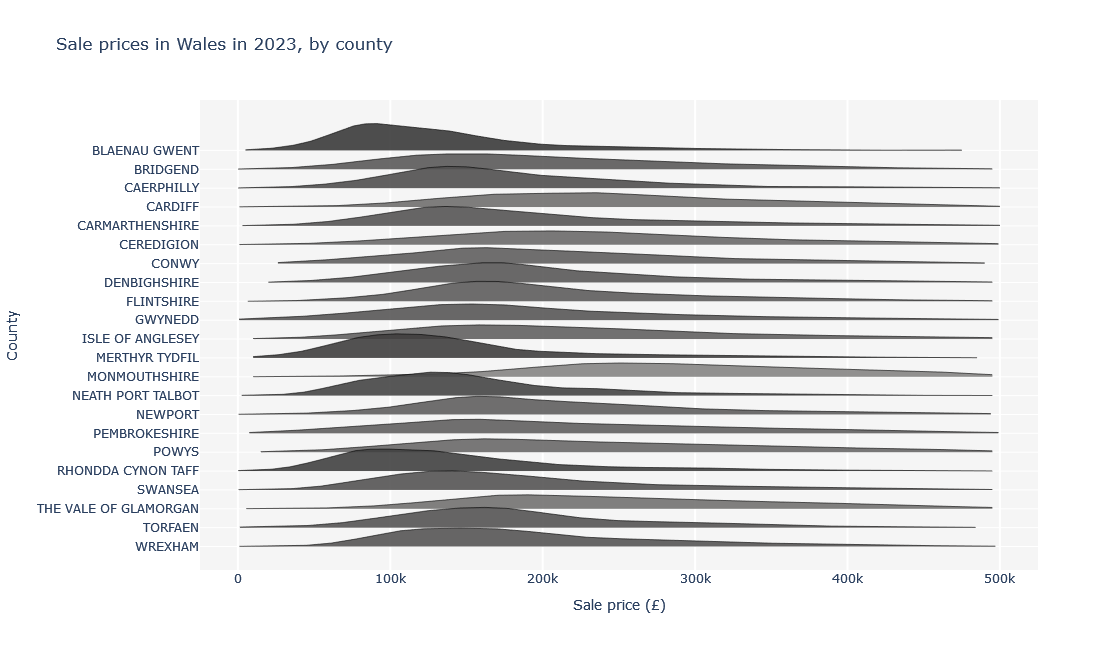

In [38]:
fig = ridgeplot(sales_by_county,
                labels=counties,
                colorscale="gray",
                coloralpha=0.9,
                colormode="mean-minmax",
                spacing=0.7)

fig.update_layout(
    title="Sale prices in Wales in 2023, by county",
    height=650,
    width=950,
    font_size=12,
    plot_bgcolor="rgb(245, 245, 245)",
    xaxis_gridcolor="white",
    yaxis_gridcolor="white",
    xaxis_gridwidth=2,
    yaxis_title="County",
    xaxis_title="Sale price (£)",
    showlegend=False
)

fig.show()

## Hierarchy

To decide what level of geographic granularity to focus on, let's look to make sure we understand the hierarchy.

Assumption is it goes county -> district -> town -> (optional locality) -> street so we should see these increase in terms of number of unique items.

In [39]:
hierarchy = ["county", "district", "town_city", "street"]
level_counts = []

for col in hierarchy:
    num_values = wales[col].nunique()
    level_counts.append(num_values)

for z in zip(hierarchy, level_counts):
    print(z)

('county', 22)
('district', 22)
('town_city', 181)
('street', 23544)


There are 22 counties and 22 districts, which is interesting. Is it a 1-to-1 mapping?

In [40]:
wales["county"].unique()

array(['CARDIFF', 'WREXHAM', 'THE VALE OF GLAMORGAN', 'NEATH PORT TALBOT',
       'ISLE OF ANGLESEY', 'CAERPHILLY', 'BLAENAU GWENT',
       'CARMARTHENSHIRE', 'RHONDDA CYNON TAFF', 'TORFAEN', 'BRIDGEND',
       'SWANSEA', 'NEWPORT', 'MERTHYR TYDFIL', 'DENBIGHSHIRE',
       'PEMBROKESHIRE', 'CONWY', 'FLINTSHIRE', 'GWYNEDD', 'CEREDIGION',
       'MONMOUTHSHIRE', 'POWYS'], dtype=object)

In [41]:
wales["district"].unique()

array(['CARDIFF', 'WREXHAM', 'THE VALE OF GLAMORGAN', 'NEATH PORT TALBOT',
       'ISLE OF ANGLESEY', 'CAERPHILLY', 'BLAENAU GWENT',
       'CARMARTHENSHIRE', 'RHONDDA CYNON TAFF', 'TORFAEN', 'BRIDGEND',
       'SWANSEA', 'NEWPORT', 'MERTHYR TYDFIL', 'DENBIGHSHIRE',
       'PEMBROKESHIRE', 'CONWY', 'FLINTSHIRE', 'GWYNEDD', 'CEREDIGION',
       'MONMOUTHSHIRE', 'POWYS'], dtype=object)

Looks like they're the same, so each county should have exactly 1 district

In [42]:
wales.groupby("county")["district"].nunique().loc[lambda x: x > 1]

Series([], Name: district, dtype: int64)

In [43]:
wales.groupby("district")["county"].nunique().loc[lambda x: x > 1]

Series([], Name: county, dtype: int64)

OK so we *don't* need the district level of hierarchy (which might be reserved for England).

So our lists will be county -> town/city -> street

Let's see an example

In [44]:
county = "MONMOUTHSHIRE"

towns = wales.loc[wales["county"] == county, "town_city"].unique()

towns

array(['MONMOUTH', 'ABERGAVENNY', 'CHEPSTOW', 'CALDICOT', 'USK',
       'NEWPORT', 'PONTYPOOL', 'HENGOED'], dtype=object)

In [45]:
town = towns[0]

streets = sorted(wales.loc[(wales["county"] == county) & (wales["town_city"] == town), "street"].unique())
streets

['-- NO STREET INFORMATION --',
 'ACER WAY',
 'AGINCOURT ROAD',
 'AGINCOURT SQUARE',
 'ALDERS DRIVE',
 'ALMSHOUSE STREET',
 'ANCRE HILL LANE',
 'ASH LANE',
 'AUDEN CLOSE',
 'BADGERS DENE',
 'BEACONS',
 'BEAUFORT ROAD',
 'BEECH ROAD',
 'BELLE ETOILE DRIVE',
 'BERRYFIELD PARK',
 'BERRYFIELD RISE',
 'BIRCHES ROAD',
 'BLAKE STREET',
 'BOLINGBROKE CLOSE',
 'BROADSTONE',
 'BROOK CRESCENT',
 'BROOK ESTATE',
 'CAPPERS PLACE',
 'CARBONNE CLOSE',
 'CASTLE CLOSE',
 'CATHERINE CLOSE',
 'CECILIFORD',
 'CHAPEL CLOSE',
 'CHARLES CLOSE',
 'CHARLES ROAD',
 'CHAUCER WAY',
 'CHERRY WALK',
 'CHESTNUT COURT',
 'CHESTNUT TERRACE',
 'CHIPPENHAM COURT',
 'CHIPPENHAMGATE STREET',
 'CHURCH STREET',
 'CINDERHILL STREET',
 'CLAWDD DU',
 'CLAYPATCH ROAD',
 'CLEDDON',
 'CORNFORD CLOSE',
 'CORNPOPPY AVENUE',
 'COURTFIELD CLOSE',
 'CRAIG Y DORTH VIEW',
 'CROSSWAYS',
 'CWRT WILLIAM JONES',
 'DIXTON CLOSE',
 'DIXTON ROAD',
 'DRYBRIDGE STREET',
 'DUCHESS CLOSE',
 'DUCHESS ROAD',
 'ELM DRIVE',
 'ELSTOB WAY',
 'FAIRVIEW C

### Export, ready for our app

In [46]:
wales.head()

transaction_id  sale_price  sale_date  postcode  \
5861  {E53EDD2E-9814-83EC-E053-6B04A8C03A59}      218500 2021-08-13  CF24 2NR   
5862  {E53EDD2E-9815-83EC-E053-6B04A8C03A59}      435000 2021-11-01  LL11 5UP   
5865  {E53EDD2E-9823-83EC-E053-6B04A8C03A59}      265000 2021-12-15  CF61 1GX   
5866  {E53EDD2E-9824-83EC-E053-6B04A8C03A59}      385937 2021-12-22  LL13 7UT   
5867  {E53EDD2E-982D-83EC-E053-6B04A8C03A59}      100000 2021-12-07  SA11 1TU   

      property_type            old_new  duration house_number_name  \
5861       Terraced  Existing property  Freehold                15   
5862          Other  Existing property  Freehold       PLAS Y PANT   
5865          Other  Existing property  Freehold                14   
5866  Semi-Detached  Existing property  Freehold                 2   
5867       Terraced  Existing property  Freehold                 2   

     second_addressable_object_name           street  locality  \
5861                            NaN   SEYMOUR STREET       NaN   
5862                            NaN  BRYN MADOC ROAD  GWYNFRYN   
5865                            NaN    HARDING CLOSE  BOVERTON   
5866                            NaN     BERSHAM ROAD       NaN   
5867                            NaN   EDWARDS STREET       NaN   

           town_city               district                 county  \
5861         CARDIFF                CARDIFF                CARDIFF   
5862         WREXHAM                WREXHAM                WREXHAM   
5865  LLANTWIT MAJOR  THE VALE OF GLAMORGAN  THE VALE OF GLAMORGAN   
5866         WREXHAM                WREXHAM                WREXHAM   
5867           NEATH      NEATH PORT TALBOT      NEATH PORT TALBOT   

     category_type record_status country  year  
5861             B             A   WALES  2021  
5862             B             A   WALES  2021  
5865             B             A   WALES  2021  
5866             B             A   WALES  2021  
5867             B             A   WALES  2021

In [47]:
wales.shape

(145438, 18)

Export to parquet to keep data types

In [48]:
wales.to_parquet("./data/wales.parquet", index=False)